# Using elliptic curves and isogenies in SageMath

This is a short tutorial to get started with elliptic curves in SageMath. For a complete reference, see the official documentation:

- [The "getting started" tutorial](http://doc.sagemath.org/html/en/tutorial/index.html);
- [Other SageMath tutorials](http://doc.sagemath.org/html/en/thematic_tutorials/index.html);
- [Finite fields (reference)](http://doc.sagemath.org/html/en/reference/finite_rings/index.html);
- [Number fields](http://doc.sagemath.org/html/en/constructions/number_fields.html), [reference](http://doc.sagemath.org/html/en/reference/number_fields/index.html);
- [Quadratic forms (reference)](http://doc.sagemath.org/html/en/reference/quadratic_forms/index.html);
- [Elliptic curves](http://doc.sagemath.org/html/en/constructions/elliptic_curves.html), [reference](http://doc.sagemath.org/html/en/reference/curves/index.html).

See also the book [Computational Mathematics with SageMath](http://dl.lateralis.org/public/sagebook/sagebook-ba6596d.pdf).

## Finite fields

We create finite fields by passing their cardinality

In [1]:
Fp = GF(11)

In [2]:
Fp

Finite Field of size 11

In [3]:
Fq = GF(11^2)
Fq

Finite Field in z2 of size 11^2

For extension fields, the generator is obtained with the `.gen()` function.

In [4]:
z = Fq.gen()
z

z2

In [5]:
z^120

1

Same thing in one go

In [6]:
K.<t> = GF(next_prime(2^128)^2)
K

Finite Field in t of size 340282366920938463463374607431768211507^2

## Elliptic curves

Curves over $ℚ$

In [7]:
E = EllipticCurve([-10,10])
E

Elliptic Curve defined by y^2 = x^3 - 10*x + 10 over Rational Field

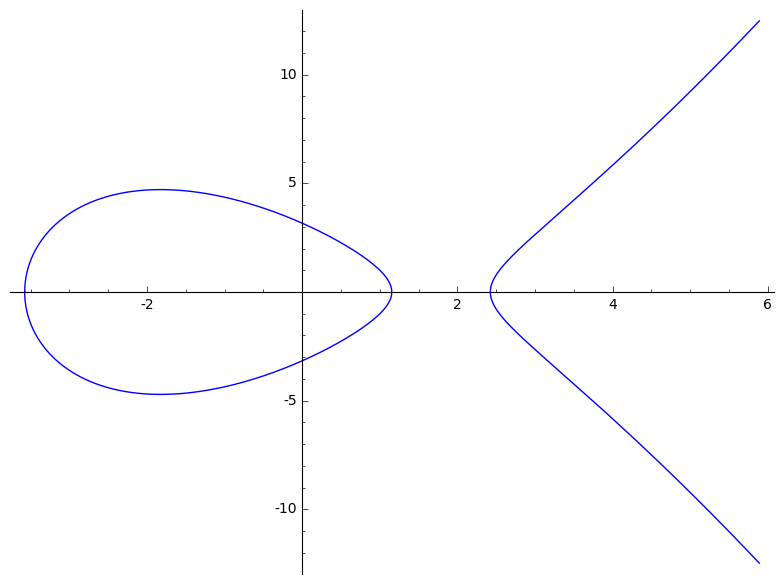

In [8]:
E.plot()

Cuvers over other fields

In [9]:
F = EllipticCurve(GF(11), [1, 0])
F

Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [10]:
F.order()

12

In [11]:
F.cardinality()

12

In [12]:
F.points()

[(0 : 0 : 1), (0 : 1 : 0), (5 : 3 : 1), (5 : 8 : 1), (7 : 3 : 1), (7 : 8 : 1), (8 : 5 : 1), (8 : 6 : 1), (9 : 1 : 1), (9 : 10 : 1), (10 : 3 : 1), (10 : 8 : 1)]

In [13]:
P = F.random_point()
P

(5 : 3 : 1)

In [14]:
P.order()

3

Isomorphisms

In [15]:
F.automorphisms()

[Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
   Via:  (u,r,s,t) = (10, 0, 0, 0)]

In [16]:
aut = F.change_ring(GF(11^2)).automorphisms()
aut

[Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (1, 0, 0, 0),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (4*z2 + 3, 0, 0, 0),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0)]

In [17]:
aut[3], aut[3]^2

(Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (7*z2 + 8, 0, 0, 0),
 Generic endomorphism of Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field in z2 of size 11^2
   Via:  (u,r,s,t) = (10, 0, 0, 0))

In [18]:
G = EllipticCurve(GF(11), [3, 0])
F.is_isomorphic(G)

True

In [19]:
u = F.isomorphism_to(G)
u

Generic morphism:
  From: Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11
  To:   Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 11
  Via:  (u,r,s,t) = (8, 0, 0, 0)

In [20]:
P, u(P)

((5 : 3 : 1), (3 : 6 : 1))

Group structure

In [21]:
F.abelian_group()

Additive abelian group isomorphic to Z/12 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11

In [22]:
g = F.gens()[0]
g

(8 : 5 : 1)

In [23]:
g.order()

12

Construct an isogeny with given kernel

In [24]:
origin = 6*g
origin

(0 : 0 : 1)

In [25]:
F.point([0,0])

(0 : 0 : 1)

In [26]:
I = F.isogeny(origin)
I

Isogeny of degree 2 from Elliptic Curve defined by y^2 = x^3 + x over Finite Field of size 11 to Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

In [27]:
I.rational_maps()

((x^2 + 1)/x, (x^2*y - y)/x^2)

In [28]:
FF = I.codomain()

In [29]:
FF

Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

In [30]:
FF.abelian_group()

Additive abelian group isomorphic to Z/6 + Z/2 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 11

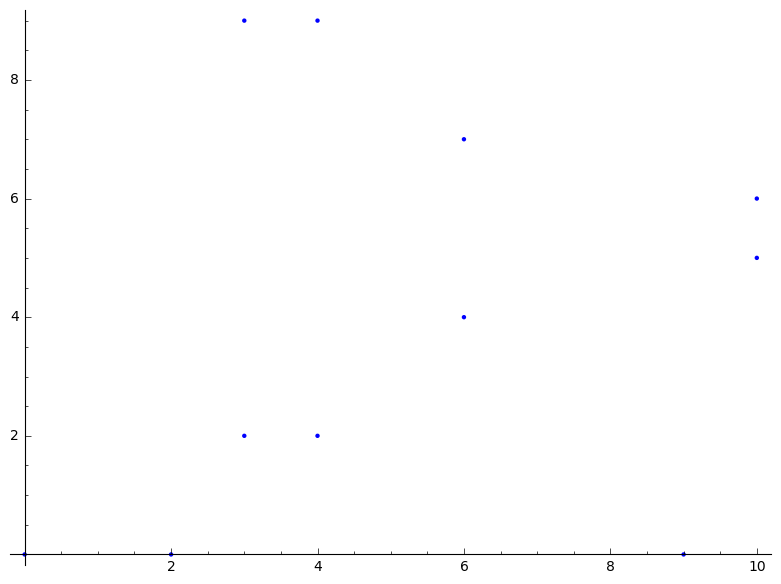

In [31]:
FF.plot()

The same example, over the rationals

In [32]:
E = EllipticCurve([1,0])

In [33]:
P = E.lift_x(0)
P

(0 : 0 : 1)

In [34]:
P.order()

2

In [35]:
J = E.isogeny(P)
EE = J.codomain()
EE

Elliptic Curve defined by y^2 = x^3 - 4*x over Rational Field

In (very) limited cases, Sage can compute the isogeny given the image curve and the degree

In [36]:
JJ = E.isogeny(None, codomain=EE, degree=2)

In [37]:
J == JJ

True

## Orders

The functionality is a bit limited, but still useful

In [38]:
E = EllipticCurve([1,0])
E

Elliptic Curve defined by y^2 = x^3 + x over Rational Field

In [39]:
E.has_cm()

True

In [40]:
E.cm_discriminant()

-4

Over finite fields

In [41]:
E = EllipticCurve(GF(101), [1,2])
E

Elliptic Curve defined by y^2 = x^3 + x + 2 over Finite Field of size 101

In [42]:
E.j_invariant()

4

In [43]:
chi = E.frobenius_polynomial()
chi

x^2 - 2*x + 101

In [44]:
chi.discriminant()

-400

In [45]:
E.trace_of_frobenius()

2

In [46]:
O = E.frobenius_order()
O

Order in Number Field in phi with defining polynomial x^2 - 2*x + 101

In [47]:
O.is_maximal()

False

In [48]:
O.discriminant()

-400

In [49]:
K = O.number_field()
K

Number Field in phi with defining polynomial x^2 - 2*x + 101

In [50]:
OK = K.maximal_order()
OK

Gaussian Integers in Number Field in phi with defining polynomial x^2 - 2*x + 101

In [51]:
OK.discriminant()

-4

In [52]:
K.class_number()

1

In [53]:
K.class_group()

Class group of order 1 of Number Field in phi with defining polynomial x^2 - 2*x + 101

In [54]:
O.class_number()

4

In [55]:
H = hilbert_class_polynomial(-400)
H

x^4 - 1938773508354872717845384224*x^3 + 12869286863161864184636279443710336*x^2 - 19075061455767889406477974994607212544*x + 87448873738295790450948276123544550117376

In [56]:
H.is_irreducible()

True

In [57]:
H.change_ring(GF(101)).factor()

(x + 7) * (x + 24) * (x + 64) * (x + 97)

## Exercises

### Give the list of all elliptic curves with complex multiplication over $ℚ$

### Give the list of all supsersingular elliptic curves over $𝔽_{101^2}$

### Find a prime $p$ and an elliptic curve $E/𝔽_p$ such that $\#E(𝔽_p) = 101$.

Hint: try to find a solution to $p+1-t = 101$, then compute the discriminant of the Frobenius and use complex multiplication theory.

### Use the previously found curve to construct an isogeny of degree $101^{10}$

### Find a prime $p$ and an elliptic curve $E/𝔽_p$ such that $\#E(𝔽_p) = 2^{127} - 1$

Warning: this is obviously a difficult exercise, and requires knowledge not contained in the course (for example, of Cornacchia's algorithm)